In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.3712   | 2.825     | 7.205     | 3.114     |
| 9         | -0.2999   | 0.0689    | 7.735     | 3.059     |
| 19        | -0.09648  | 1.346     | 8.978     | 0.1366    |
| 61        | -0.05993  | 1.065     | 8.806     | 0.225     |
| 80        | -0.05065  | 0.8529    | 8.552     | 0.263     |
| 90        | -0.04288  | 0.7097    | 8.05      | 0.2845    |
Curve params found
{'push': 0.7097145860366854,
 'shift': 8.050432364247376,
 'slope': 0.2845114172091567}
-
## Chance of nonscaling delay ##


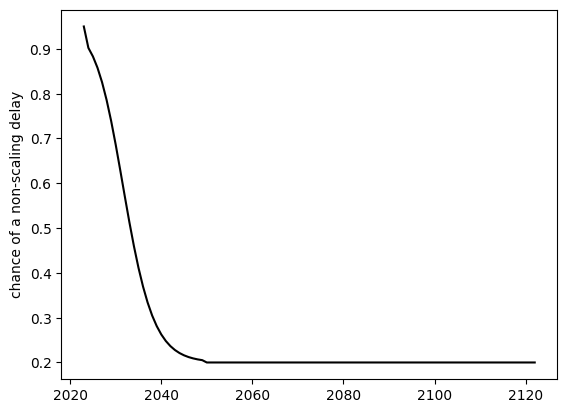

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 83%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 79%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 74%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.7),
                     (2035, 0.5),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2543   | 0.5654    | 8.396     | 6.571     |
| 5         | -0.2519   | 0.4939    | 9.461     | 9.286     |
| 15        | -0.2502   | 0.1376    | 1.588     | 9.108     |
| 42        | -0.2489   | 0.09124   | 0.5116    | 1.467     |
| 53        | -0.2479   | 0.01      | 10.0      | 2.897     |
| 54        | -0.1756   | 1.379     | 10.0      | 0.2774    |
| 63        | -0.1118   | 0.8796    | 9.903     | 0.591     |
| 76        | -0.07803  | 0.5565    | 9.115     | 0.6393    |
| 80        | -0.03305  | 0.2066    | 9.593     | 0.7344    |
| 110       | -0.02778  | 0.01      | 7.452     | 1.296     |
Curve params found
{'push': 0.01, 'shift': 7.451515822413487, 'slope': 1.2957301958399332}
-
## Chance of nonscaling delay ##


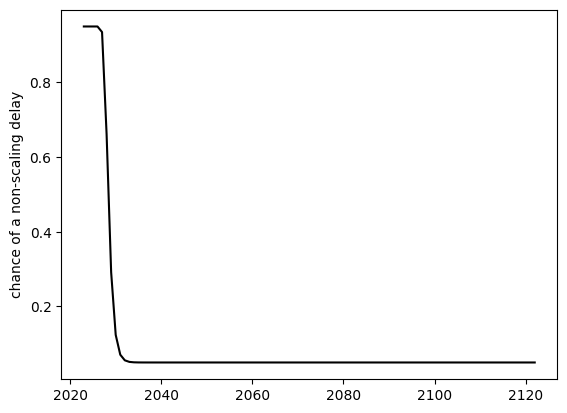

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.03987  | 0.6784    | 5.364     | 6.97      |
| 33        | -0.03844  | 0.7194    | 7.504     | 7.678     |
| 36        | -0.03333  | 0.01657   | 1.808     | 5.486     |
| 51        | -0.03333  | 0.01      | 2.557     | 4.132     |
| 63        | -0.03333  | 0.01      | 4.792     | 3.908     |
| 64        | -0.03333  | 0.01      | 3.889     | 2.537     |
| 87        | -0.03179  | 0.01      | 4.516     | 1.468     |
Curve params found
{'push': 0.01, 'shift': 4.51610701099092, 'slope': 1.4681552240509588}
-
## Chance of nonscaling delay ##


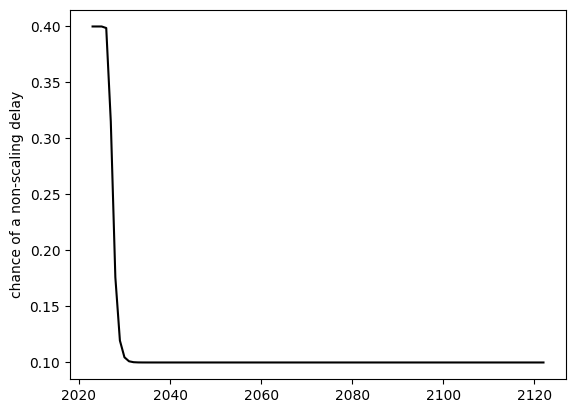

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [4]:
nonscaling_points = [(2023, 0.4),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(1, 5)],
                                                                                   [0.3, sq.lognorm(5, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

## Save

In [5]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
